In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Credit Card Clustering

/content/gdrive/MyDrive/Credit Card Clustering


In [ ]:
#!pip install shap

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
#import shap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Objective

To know customer segmentetion and identify Credit Card Customer clustering for marketing needs

# Initial EDA

In [5]:
def print_unique_value(df):
    for col in df.columns:
        print(f"Column: {col}")
        print(df[col].unique())
        print("="*10)
print_unique_value(df)

Column: CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Column: BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
Column: BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
Column: PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
Column: ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
Column: INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
Column: CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
Column: PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df)

,variable,missing values,filling factor (%)
0,MINIMUM_PAYMENTS,313,96.502793
1,CREDIT_LIMIT,1,99.988827
2,CUST_ID,0,100.000000
3,PAYMENTS,0,100.000000
4,PURCHASES_TRX,0,100.000000
5,CASH_ADVANCE_TRX,0,100.000000
6,CASH_ADVANCE_FREQUENCY,0,100.000000
7,PURCHASES_INSTALLMENTS_FREQUENCY,0,100.000000
8,ONEOFF_PURCHASES_FREQUENCY,0,100.000000
9,PURCHASES_FREQUENCY,0,100.000000


In [9]:
df.duplicated().sum()

0

In [10]:
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

# Cleansing

In [58]:
df['MINIMUM_PAYMENTS'] = df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].mean())

In [59]:
df['CREDIT_LIMIT'] = df["CREDIT_LIMIT"].fillna(value=df["CREDIT_LIMIT"].mean())

Filling min_pay with mean values

In [60]:
df = df.drop(columns = 'CUST_ID')
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Drop Cust_id column Not necessary for feature

# EDA

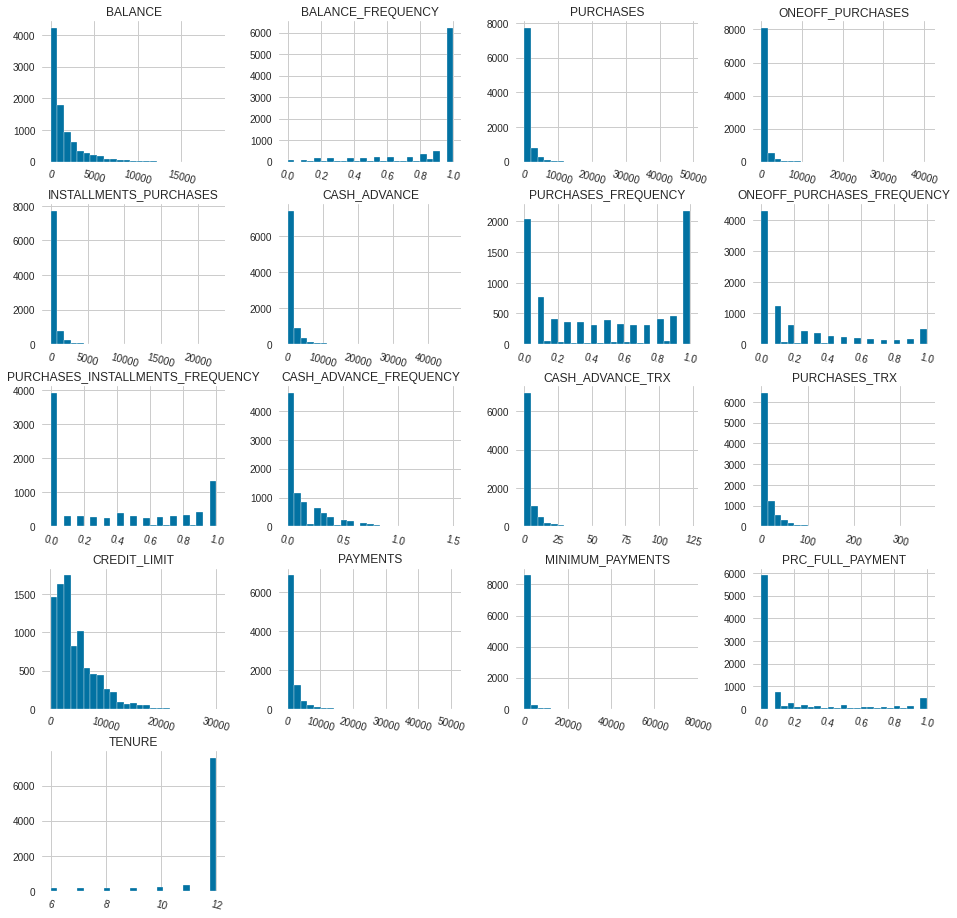

In [14]:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [15]:
feat_num = list(df)

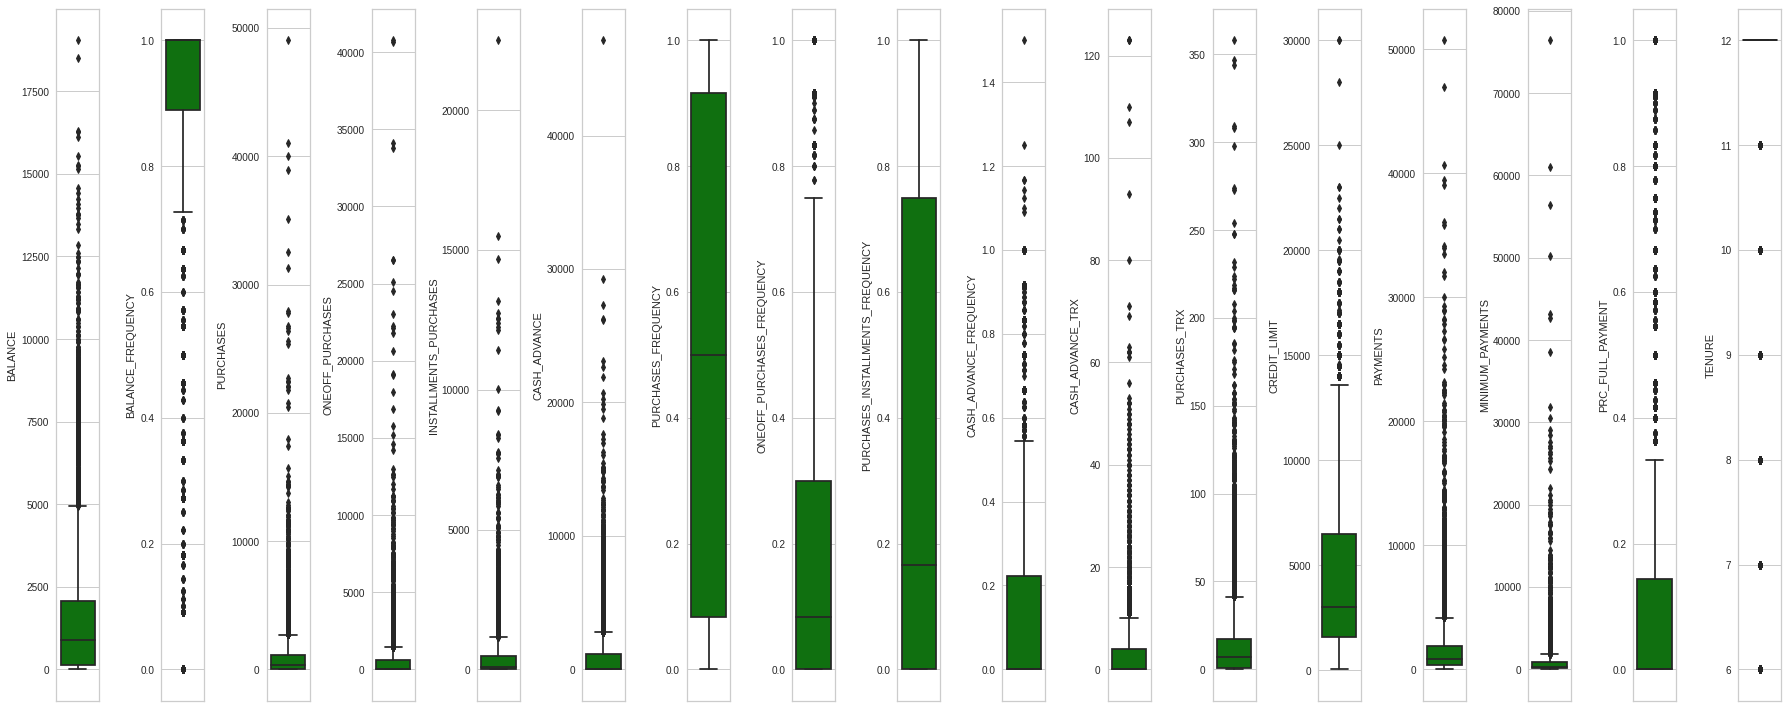

In [16]:
plt.figure(figsize=(25, 10))
for i in range(0, len(feat_num)):
    plt.subplot(1, 17, i+1)
    sns.boxplot(y=df[feat_num[i]],color='green',orient='v')
    plt.tight_layout()

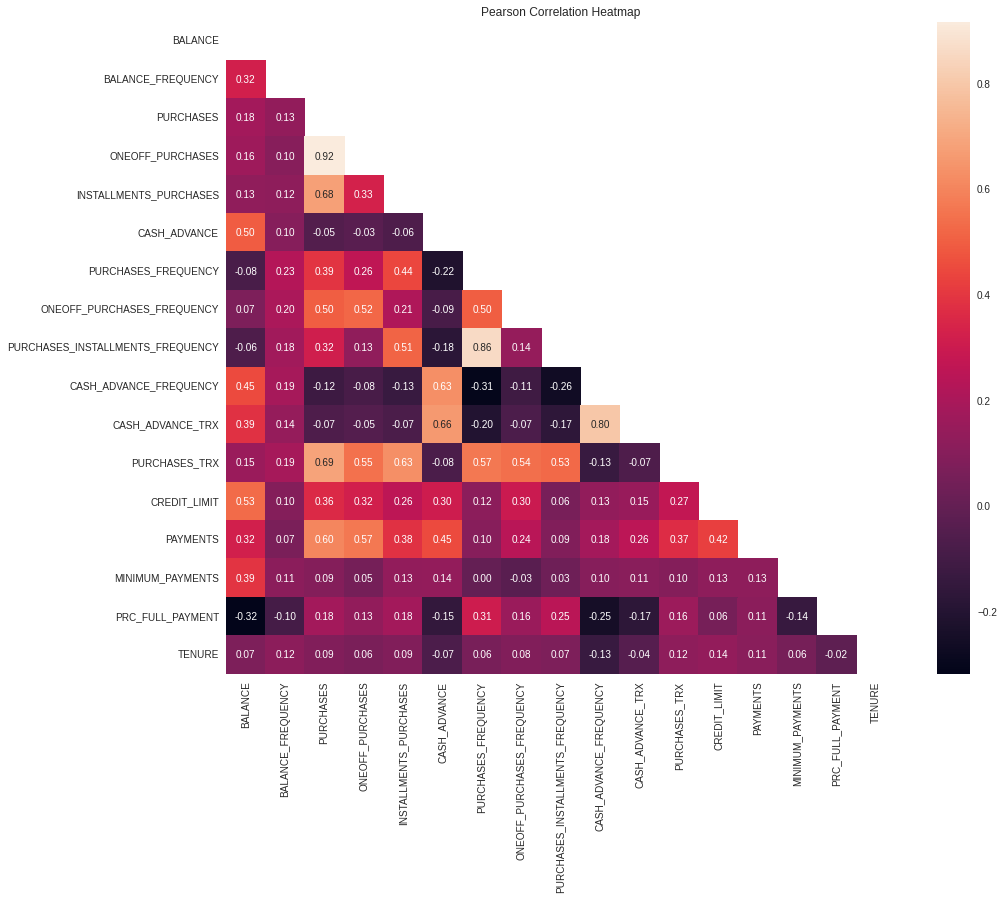

In [17]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Outlier treatment


In [61]:
def remove_outlier(datacolumn):
    sorted(datacolumn)
    Q1 = datacolumn.quantile(0.25)
    Q3 = datacolumn.quantile(0.75)
    IQR=Q3-Q1
    lower= Q1-(1.5 * IQR)
    upper= Q3+(1.5 * IQR)
    return lower, upper

for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

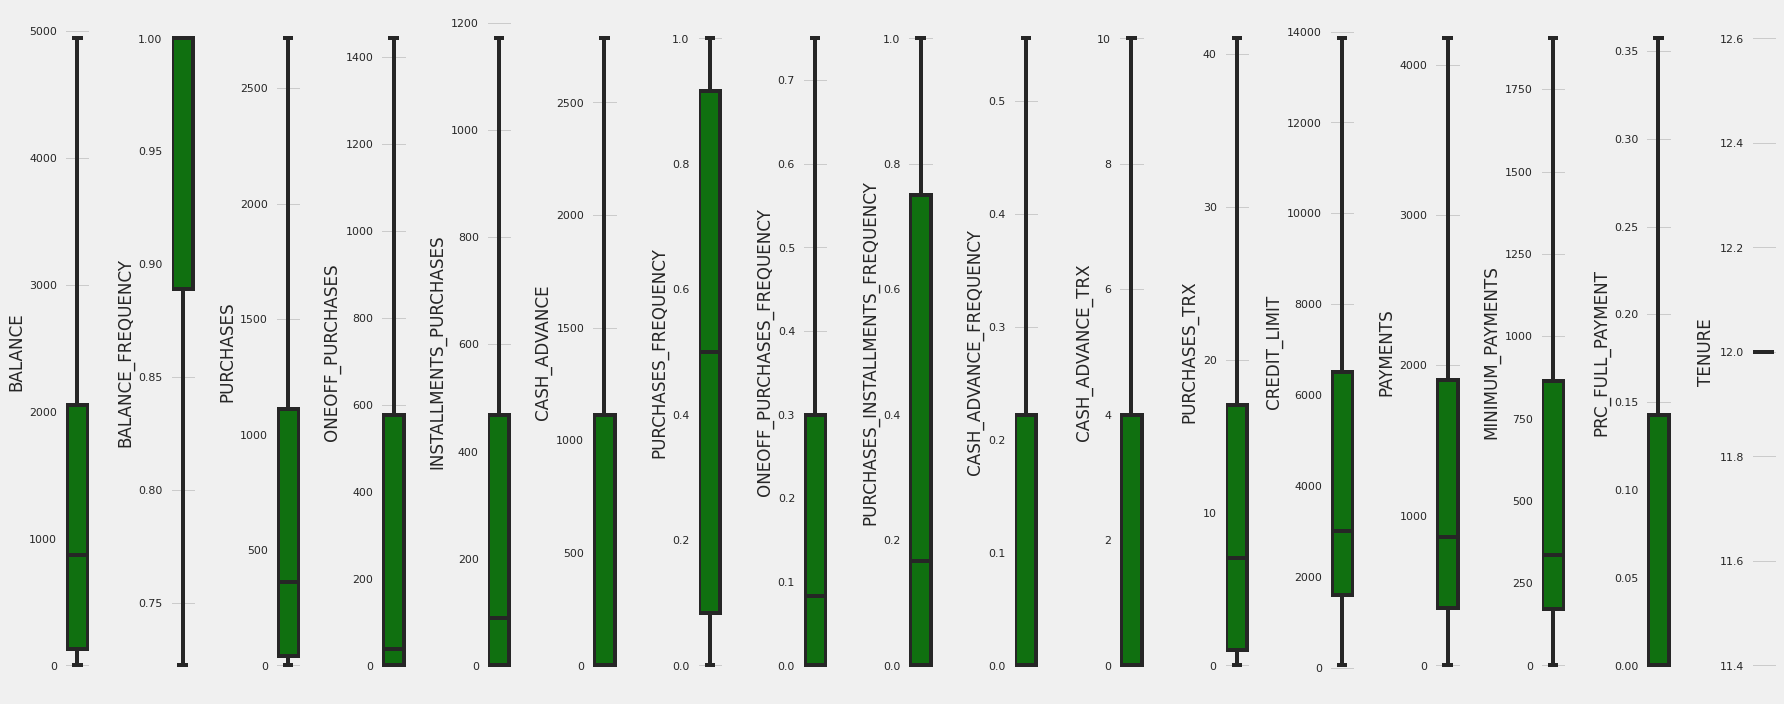

In [62]:
plt.figure(figsize=(25, 10))
for i in range(0, len(feat_num)):
    plt.subplot(1, 17, i+1)
    sns.boxplot(y=df[feat_num[i]],color='green',orient='v')
    plt.tight_layout()

# Kmeans Modeling

Elbow Method

The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


In [63]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df.astype(float))

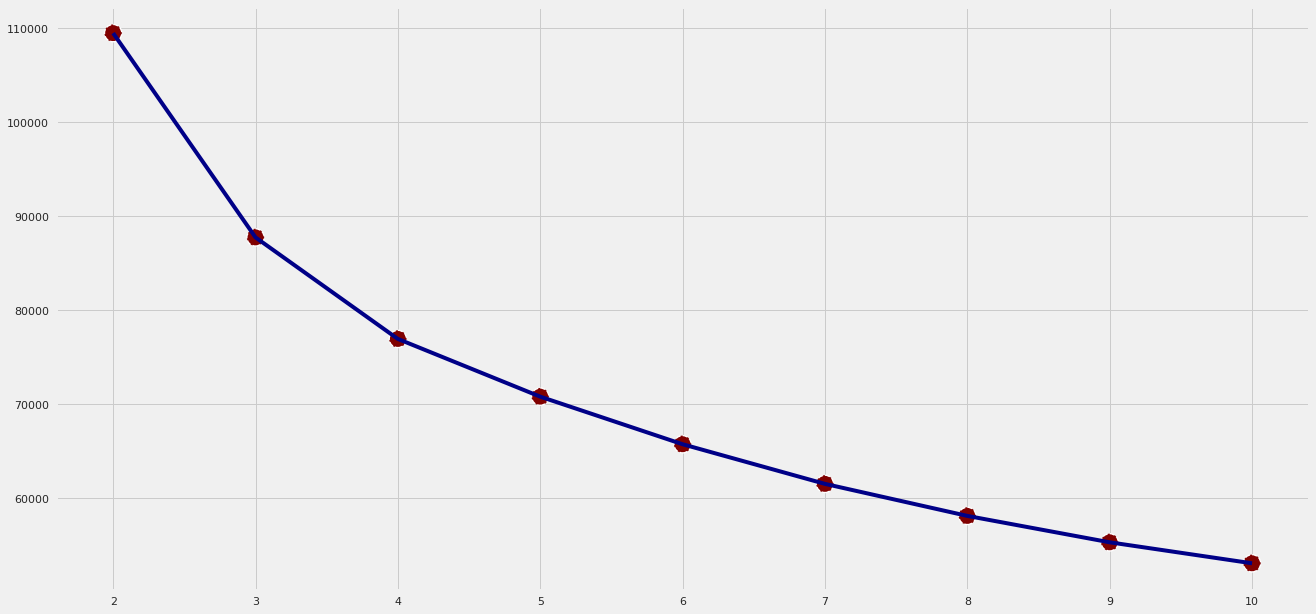

In [64]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [65]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [66]:
df_data_std = pd.DataFrame(data=data_std, columns=list(df))

In [67]:
df_data_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [68]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.4000,0.0000,95.40000,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.0000,0.0000,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.722223,1499.0000,1443.5125,0.00000,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0
4,817.714335,1.000000,16.0000,16.0000,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0
5,1809.828751,1.000000,1333.2800,0.0000,1171.59375,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,1904.229874,0.000000,12.0,1
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,41.0,13500.0,4177.921543,198.065894,0.357143,12.0,2
7,1823.652743,1.000000,436.2000,0.0000,436.20000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,1
8,1014.926473,1.000000,861.4900,661.4900,200.00000,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0
9,152.225975,0.722223,1281.6000,1281.6000,0.00000,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0



Dimensionality Reduction

Dimensionality Reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.


In [69]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-1.637715,-2.423495,0
1,-2.215350,2.245515,3
2,1.168272,0.275078,2
3,-0.523101,-0.209588,0
4,-1.657319,-1.642660,0


# Evaluate Model

In [70]:
print(f'Silhouette Score = {silhouette_score(data_pca, kmeans.labels_)}')

Silhouette Score = 0.40114353696962396


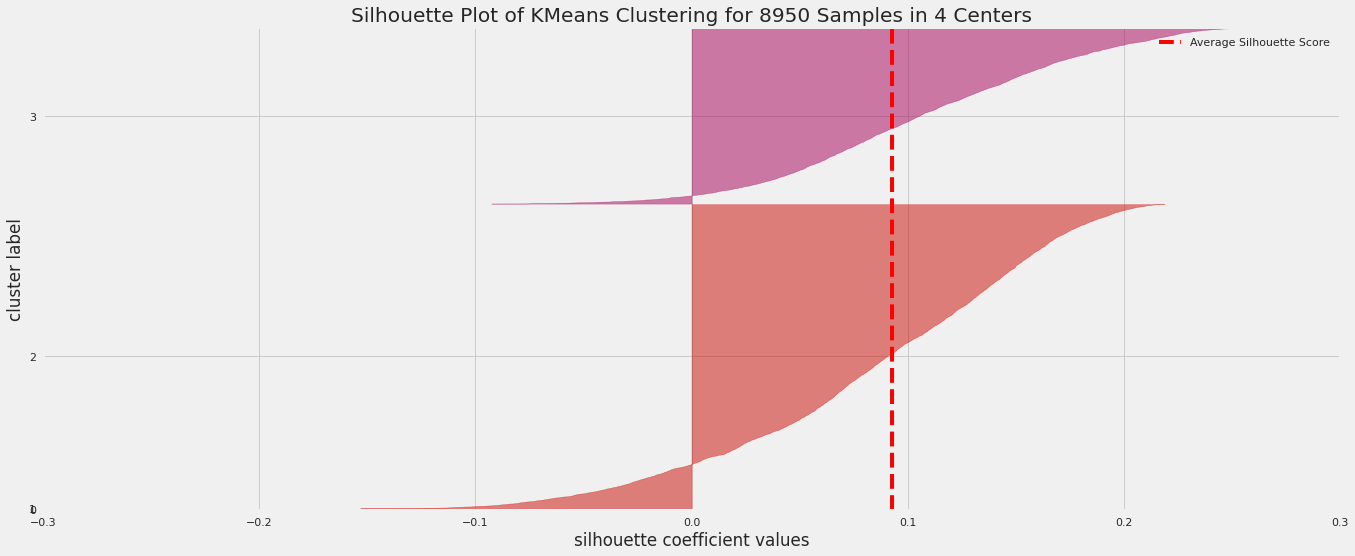

In [71]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df.drop(['clusters'],axis=1))
visualizer.show()

# Insight

In [72]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

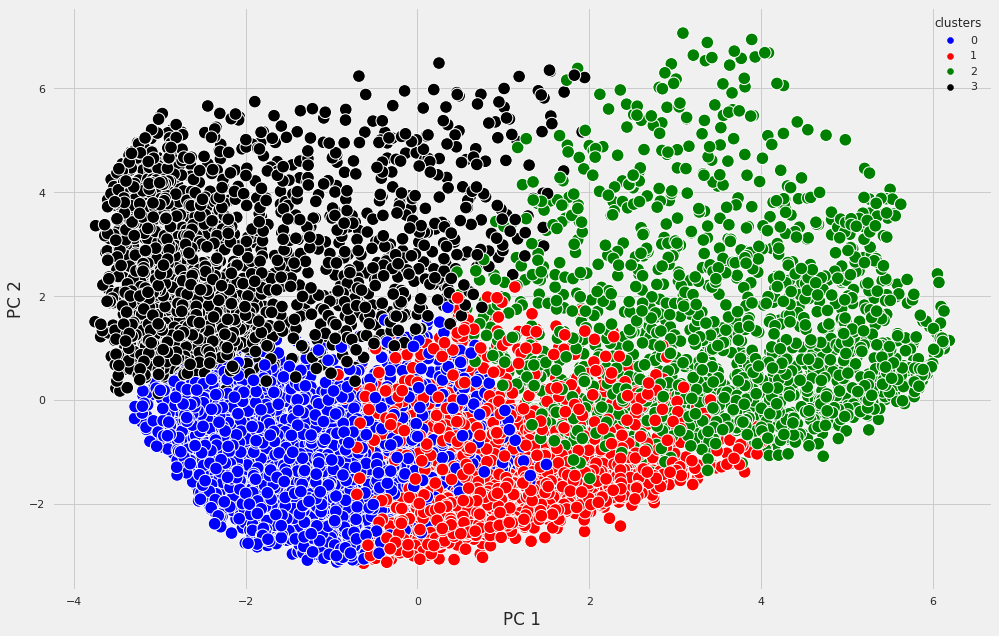

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='white',
    linestyle='-',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

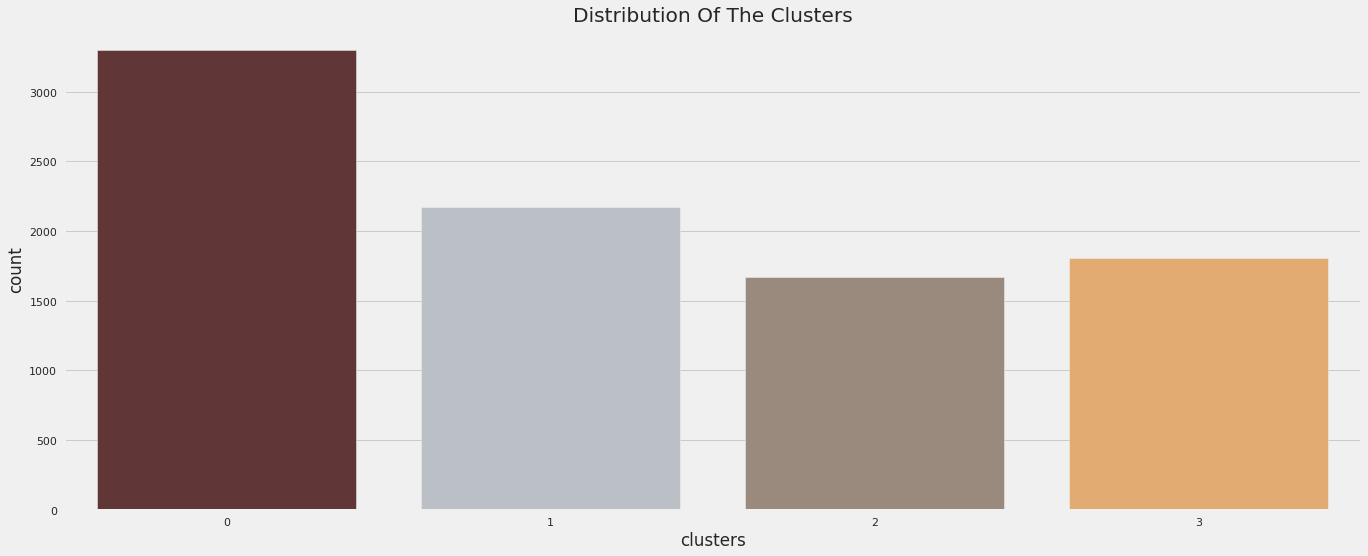

In [75]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [76]:
display(df.groupby('clusters').agg(['mean','median']))

BALANCE              BALANCE_FREQUENCY           PURCHASES  \
                 mean       median              mean median         mean   
clusters                                                                   
0          812.573570   564.026880          0.888709    1.0   260.023022   
1          486.935541   117.529909          0.929573    1.0   707.597294   
2         1864.165216  1270.868160          0.979675    1.0  2213.948895   
3         3093.975086  3024.629054          0.967816    1.0   280.592663   

                   ONEOFF_PURCHASES            INSTALLMENTS_PURCHASES  \
            median             mean     median                   mean   
clusters                                                                
0           94.300       206.696115     0.0000              45.416846   
1          548.965       104.926103     0.0000             536.872778   
2         2569.970      1179.391207  1443.5125             686.627143   
3            0.000       162.788567     0.0000             100.536225   

                   ... CREDIT_LIMIT             PAYMENTS               \
           median  ...         mean  median         mean       median   
clusters           ...                                                  
0           0.000  ...  3145.331631  2400.0   760.335999   467.652307   
1         447.550  ...  3184.678843  2500.0   830.335694   603.558983   
2         758.325  ...  6803.706126  6500.0  2534.217466  2385.814772   
3           0.000  ...  6027.734225  5700.0  1943.444049  1502.205631   

         MINIMUM_PAYMENTS              PRC_FULL_PAYMENT        TENURE         
                     mean       median             mean median   mean median  
clusters                                                                      
0              412.000859   271.728487         0.047696    0.0   12.0   12.0  
1              386.362287   175.663629         0.166471    0.1   12.0   12.0  
2              683.679049   417.618349         0.124998    0.0   12.0   12.0  
3             1091.349275  1024.126428         0.029107    0.0   12.0   12.0  

[4 rows x 34 columns]

* Cluater 0 = Average Income & Low Spending

* Cluster 1 = Low Income & High Spending

* Cluster 2 = High Income & High Spending

* Cluster 3 = High Income & Low Spending

but for the better view lets take a look on visualization chart

# Radar Plot

In [85]:
df_radar = df.copy()
df_radar['clusters'] = kmeans.labels_
df_radar.groupby('clusters').median()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,564.026880,1.0,94.300,0.0000,0.000,18.804195,0.083333,0.000000,0.000000,0.083333,1.0,1.0,2400.0,467.652307,271.728487,0.0,12.0
1,117.529909,1.0,548.965,0.0000,447.550,0.000000,0.916667,0.000000,0.833333,0.000000,0.0,12.0,2500.0,603.558983,175.663629,0.1,12.0
2,1270.868160,1.0,2569.970,1443.5125,758.325,0.000000,1.000000,0.666667,0.750000,0.000000,0.0,35.0,6500.0,2385.814772,417.618349,0.0,12.0
3,3024.629054,1.0,0.000,0.0000,0.000,2710.056224,0.000000,0.000000,0.000000,0.400000,9.0,0.0,5700.0,1502.205631,1024.126428,0.0,12.0


In [86]:
df_radar = pd.DataFrame(df_radar.groupby('clusters').median(), columns=list(df_radar))

In [87]:
df_radar = df_radar.drop(columns='clusters', axis=1)

In [88]:
df_radar

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,564.026880,1.0,94.300,0.0000,0.000,18.804195,0.083333,0.000000,0.000000,0.083333,1.0,1.0,2400.0,467.652307,271.728487,0.0,12.0
1,117.529909,1.0,548.965,0.0000,447.550,0.000000,0.916667,0.000000,0.833333,0.000000,0.0,12.0,2500.0,603.558983,175.663629,0.1,12.0
2,1270.868160,1.0,2569.970,1443.5125,758.325,0.000000,1.000000,0.666667,0.750000,0.000000,0.0,35.0,6500.0,2385.814772,417.618349,0.0,12.0
3,3024.629054,1.0,0.000,0.0000,0.000,2710.056224,0.000000,0.000000,0.000000,0.400000,9.0,0.0,5700.0,1502.205631,1024.126428,0.0,12.0


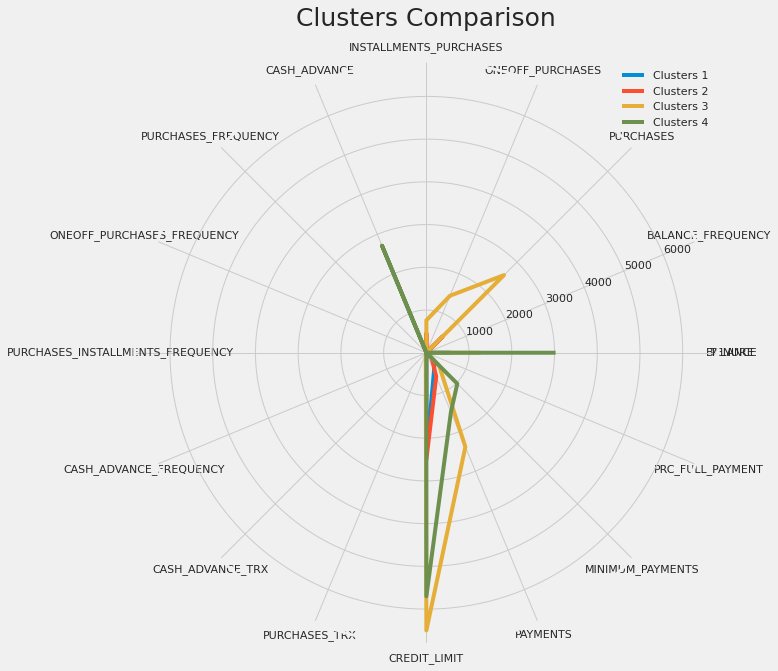

In [96]:
categories = list(df_radar)
categories = [*categories, categories[0]]

Clusters_1 = df_radar.loc[0].values
Clusters_2 = df_radar.loc[1].values
Clusters_3 = df_radar.loc[2].values
Clusters_4 = df_radar.loc[3].values
# Clusters_1 = [*Clusters_1, Clusters_1[0]]
# Clusters_2 = [*Clusters_2, Clusters_2[0]]
# Clusters_3 = [*Clusters_3, Clusters_3[0]]
# Clusters_4 = [*Clusters_4, Clusters_4[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(15, 10))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Clusters 1')
plt.plot(label_loc, Clusters_2, label='Clusters 2')
plt.plot(label_loc, Clusters_3, label='Clusters 3')
plt.plot(label_loc, Clusters_4, label='Clusters 4')
plt.title('Clusters Comparison', size=25, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

##Cluster 1

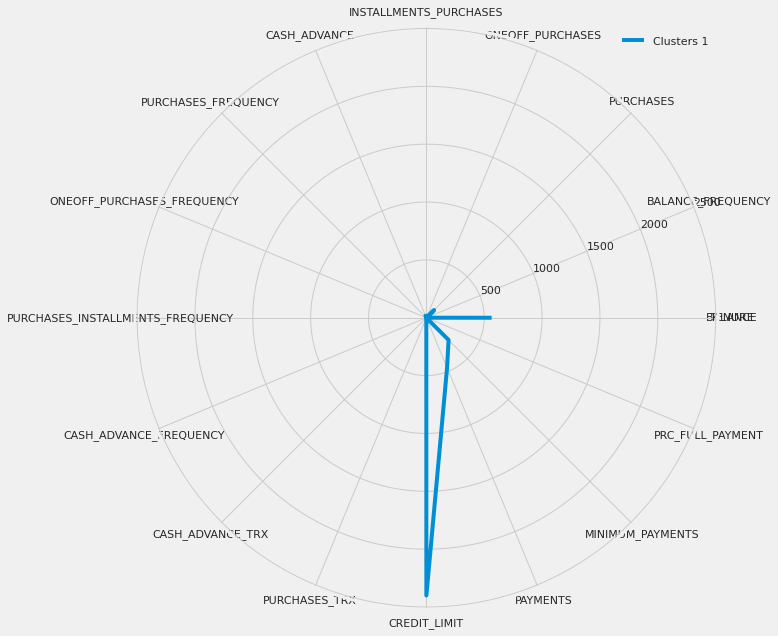

In [90]:
plt.figure(figsize=(15, 10))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Clusters 1')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Cluster 1 shows customers on average income and had a low spending. and they don't purchase much. their PURCHASES is below average as well, and their PURCHASE FREQUENCY is very low.

##Cluster 2


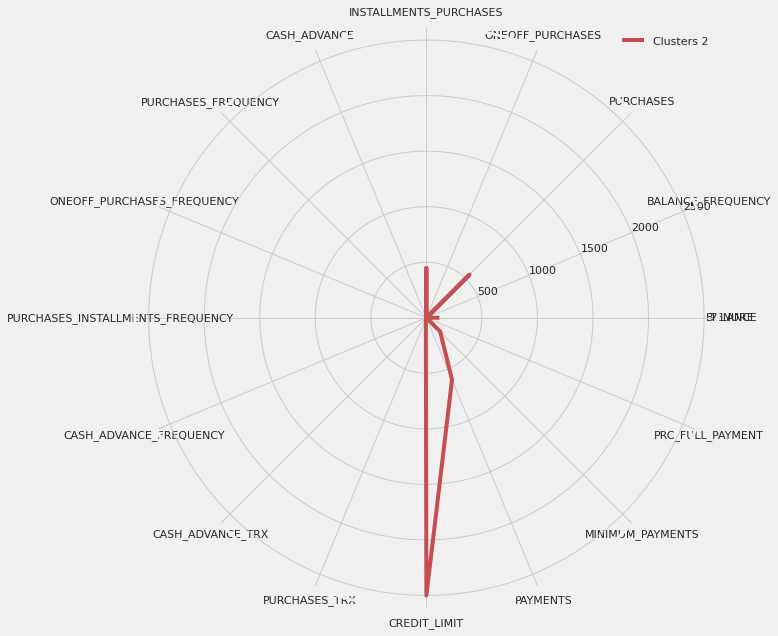

In [91]:
plt.figure(figsize=(15, 10))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_2, label='Clusters 2', color='r')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Cluster 2 customers who had lowest income. BALANCE, it is the lowest of all. but doesn't keep them away from purchasing, in terms of PURCHASES, they are the second tier. with INSTALLMENTSPURCHASES being high.

## Cluster 3

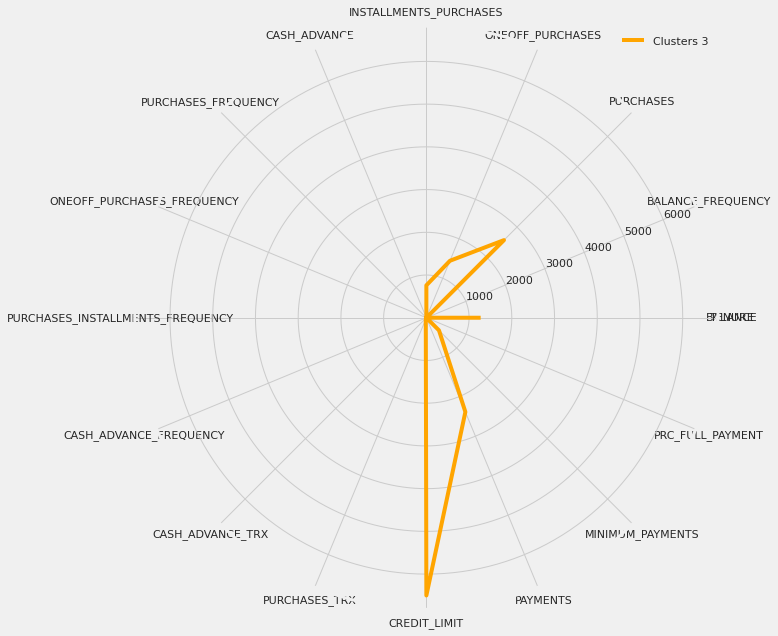

In [92]:
plt.figure(figsize=(15, 10))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_3, label='Clusters 3', color='orange')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Cluster 3 customers who have a good income (second highest BALANCE) and they purchase a lot highest PURCHASESFREQUENCY

##Cluster 4

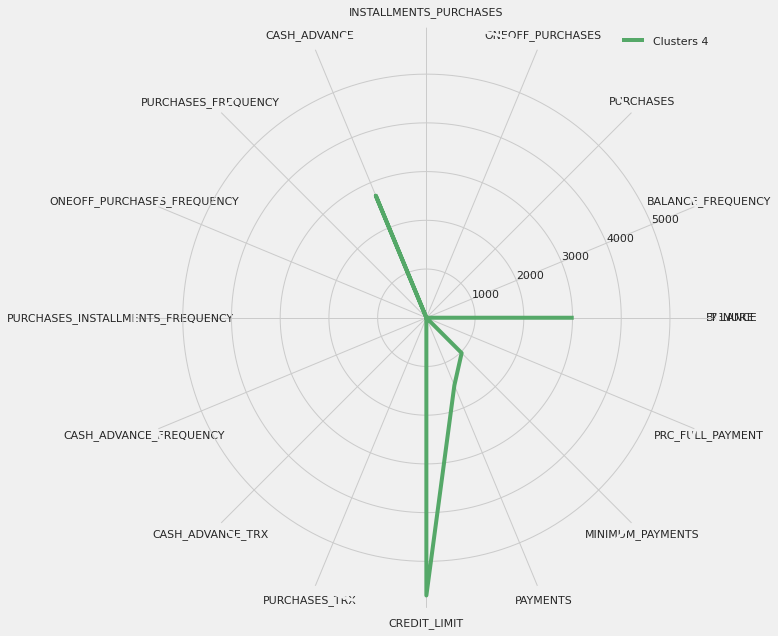

In [93]:
plt.figure(figsize=(15, 10))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_4, label='Clusters 4', color='g')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Cluster 4 customer with highest BALANCE, but lowest PURCHASE of all. and purchase stuff on cash highest CASHADVANCE their get cash on credit card and buy stuff